<a href="https://colab.research.google.com/github/minsaee/ai_chat_python/blob/master/401_pandas_2023_%EC%B4%9D%EC%B6%9C%EC%83%9D%EC%95%84%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 국가통계포털_행정구역(시군구)별, 성별 인구수  
 - https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3&vw_cd=MT_ZTITLE&list_id=A_7&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE


### 구글 코랩에서 한글 문제 해결  
- 아래 코드 설치를 한다.  
- 코랩 런타임 -> 런타임 다시 시작 한다.

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,665 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120882 files and dire

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ai_chat_python

Mounted at /content/drive
/content/drive/MyDrive/ai_chat_python


In [2]:
import numpy as np
import pandas as pd
# 그래프라이브러리
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib.font_manager

sorted([ f.name for f in  matplotlib.font_manager.fontManager.ttflist if f.name.startswith('Nanum')])
plt.rc('font', family='NanumBarunGothic')

['NanumBarunGothic',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumGothic',
 'NanumGothicCoding',
 'NanumGothicCoding',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumSquare',
 'NanumSquareRound',
 'NanumSquareRound']

In [4]:
df_kosis = pd.read_csv('./source/시군구_성_월별_출생_20231201114655.csv', encoding='cp949')
df_kosis.head()

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2022.09.2,2022.10,2022.10.1,2022.10.2,2022.11,2022.11.1,2022.11.2,2022.12,2022.12.1,2022.12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,10715,20646,10530,10116,18981,9737,9244,16896,8684,8212
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,1831,3612,1794,1818,3230,1678,1552,2901,1472,1429
3,부산광역시,4201,2260,1941,3910,2104,1806,4304,2234,2070,...,575,1166,602,564,977,479,498,957,528,429
4,대구광역시,3345,1764,1581,2994,1608,1386,3337,1815,1522,...,416,848,428,420,802,406,396,663,334,329


In [5]:
df_kosis.tail()

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2022.09.2,2022.10,2022.10.1,2022.10.2,2022.11,2022.11.1,2022.11.2,2022.12,2022.12.1,2022.12.2
14,전라북도,2579,1362,1217,2261,1150,1111,2364,1186,1178,...,300,577,284,293,575,280,295,483,254,229
15,전라남도,2685,1413,1272,2547,1286,1261,2457,1246,1211,...,386,642,331,311,566,289,277,500,250,250
16,경상북도,3362,1802,1560,3257,1751,1506,3343,1754,1589,...,493,959,481,478,885,462,423,770,404,366
17,경상남도,4020,2171,1849,3796,2003,1793,4021,2122,1899,...,633,1157,618,539,1031,535,496,993,490,503
18,제주특별자치도,734,373,361,737,386,351,750,419,331,...,153,278,142,136,277,136,141,233,112,121


In [6]:
df_kosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 937 entries, 시군구별 to 2022.12.2
dtypes: object(937)
memory usage: 139.2+ KB


In [7]:
df_kosis.shape

(19, 937)

In [8]:
# 모든 columns 보기
pd.options.display.max_columns=829

In [9]:
pd.options.display.max_rows=829

In [10]:
df_kosis.head(3)

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,1997.04,1997.04.1,1997.04.2,1997.05,1997.05.1,1997.05.2,1997.06,1997.06.1,1997.06.2,1997.07,1997.07.1,1997.07.2,1997.08,1997.08.1,1997.08.2,1997.09,1997.09.1,1997.09.2,1997.10,1997.10.1,1997.10.2,1997.11,1997.11.1,1997.11.2,1997.12,1997.12.1,1997.12.2,1998.01,1998.01.1,1998.01.2,1998.02,1998.02.1,1998.02.2,1998.03,1998.03.1,1998.03.2,1998.04,1998.04.1,1998.04.2,1998.05,1998.05.1,1998.05.2,1998.06,1998.06.1,1998.06.2,1998.07,1998.07.1,1998.07.2,1998.08,1998.08.1,1998.08.2,1998.09,1998.09.1,1998.09.2,1998.10,1998.10.1,1998.10.2,1998.11,1998.11.1,1998.11.2,1998.12,1998.12.1,1998.12.2,1999.01,1999.01.1,1999.01.2,1999.02,1999.02.1,1999.02.2,1999.03,1999.03.1,1999.03.2,1999.04,1999.04.1,1999.04.2,1999.05,1999.05.1,1999.05.2,1999.06,1999.06.1,1999.06.2,1999.07,1999.07.1,1999.07.2,1999.08,1999.08.1,1999.08.2,1999.09,1999.09.1,1999.09.2,1999.10,1999.10.1,1999.10.2,1999.11,1999.11.1,1999.11.2,1999.12,1999.12.1,1999.12.2,2000.01,2000.01.1,2000.01.2,2000.02,2000.02.1,2000.02.2,2000.03,2000.03.1,2000.03.2,2000.04,2000.04.1,2000.04.2,2000.05,2000.05.1,2000.05.2,2000.06,2000.06.1,2000.06.2,2000.07,2000.07.1,2000.07.2,2000.08,2000.08.1,2000.08.2,2000.09,2000.09.1,2000.09.2,2000.10,2000.10.1,2000.10.2,2000.11,2000.11.1,2000.11.2,2000.12,2000.12.1,2000.12.2,2001.01,2001.01.1,2001.01.2,2001.02,2001.02.1,2001.02.2,2001.03,2001.03.1,2001.03.2,2001.04,2001.04.1,2001.04.2,2001.05,2001.05.1,2001.05.2,2001.06,2001.06.1,2001.06.2,2001.07,2001.07.1,2001.07.2,2001.08,2001.08.1,2001.08.2,2001.09,2001.09.1,2001.09.2,2001.10,2001.10.1,2001.10.2,2001.11,2001.11.1,2001.11.2,2001.12,2001.12.1,2001.12.2,2002.01,2002.01.1,2002.01.2,2002.02,2002.02.1,2002.02.2,2002.03,2002.03.1,2002.03.2,2002.04,2002.04.1,2002.04.2,2002.05,2002.05.1,2002.05.2,2002.06,2002.06.1,2002.06.2,2002.07,2002.07.1,2002.07.2,2002.08,2002.08.1,2002.08.2,2002.09,2002.09.1,2002.09.2,2002.10,2002.10.1,2002.10.2,2002.11,2002.11.1,2002.11.2,2002.12,2002.12.1,2002.12.2,2003.01,2003.01.1,2003.01.2,2003.02,2003.02.1,2003.02.2,2003.03,2003.03.1,2003.03.2,2003.04,2003.04.1,2003.04.2,2003.05,2003.05.1,2003.05.2,2003.06,2003.06.1,2003.06.2,2003.07,2003.07.1,2003.07.2,2003.08,2003.08.1,2003.08.2,2003.09,2003.09.1,2003.09.2,2003.10,2003.10.1,2003.10.2,2003.11,2003.11.1,2003.11.2,2003.12,2003.12.1,2003.12.2,2004.01,2004.01.1,2004.01.2,2004.02,2004.02.1,2004.02.2,2004.03,2004.03.1,2004.03.2,2004.04,2004.04.1,2004.04.2,2004.05,2004.05.1,2004.05.2,2004.06,2004.06.1,2004.06.2,2004.07,2004.07.1,2004.07.2,2004.08,2004.08.1,2004.08.2,2004.09,2004.09.1,2004.09.2,2004.10,2004.10.1,2004.10.2,2004.11,2004.11.1,2004.11.2,2004.12,2004.12.1,2004.12.2,2005.01,2005.01.1,2005.01.2,2005.02,2005.02.1,2005.02.2,2005.03,2005.03.1,2005.03.2,2005.04,2005.04.1,2005.04.2,2005.05,2005.05.1,2005.05.2,2005.06,2005.06.1,2005.06.2,2005.07,2005.07.1,2005.07.2,2005.08,2005.08.1,2005.08.2,2005.09,2005.09.1,2005.09.2,2005.10,2005.10.1,2005.10.2,2005.11,2005.11.1,2005.11.2,2005.12,2005.12.1,2005.12.2,2006.01,2006.01.1,2006.01.2,2006.02,2006.02.1,2006.02.2,2006.03,2006.03.1,2006.03.2,2006.04,2006.04.1,2006.04.2,2006.05,2006.05.1,2006.05.2,2006.06,2006.06.1,2006.06.2,2006.07,2006.07.1,2006.07.2,2006.08,2006.08.1,2006.08.2,2006.09,2006.09.1,2006.09.2,2006.10,2006.10.1,2006.10.2,2006.11,2006.11.1,2006.11.2,2006.12,2006.12.1,2006.12.2,2007.01,2007.01.1,2007.01.2,2007.02,2007.02.1,2007.02.2,2007.03,2007.03.1,2007.03.2,2007.04,2007.04.1,2007.04.2,2007.05,2007.05.1,2007.05.2,2007.06,2007.06.1,2007.06.2,2007.07,2007.07.1,2007.07.2,2007.08,2007.08.1,2007.08.2,2007.09,2007.09.1,2007.09.2,2007.10,2007.10.1,2007.10.2,2007.11,2007.11.1,2007.11.2,2007.12,2007.12.1,2007.12.2,2008.01,2008.01.1,2008.01.2,2008.02,2008.02.1,2008.02.2,2008.03,2008.03.1,2008.03.2,2008.04,2008.04.1,2008.04.2,2008.05,2008.05.1,2008.05.2,2008.06,2008.06.1,...,2011.07,2011.07.1,2011.07.2,2011.08,2011.08.1,2011.08.2,2011.09,2011.09.1,2011.09.2,2011.10,2011.10.1,2011.10.2,2011.11,2011.11.1,2011.1

***깔끔한 데이터(tidy data)***
1. R커뮤니티의 해드리 위컴이  한 논문에서 처음 소개한 개념으로,데이터셋을 구조화하는 프레임워크이다.  
2. 해드리 위컴이 논문에서 제시한 깔끔한 데이터의 조건
   (1) 행은 관측값으로 나타내야 한다.   
   (2) 열은 변수를 나타내야 한다.
   (3) 관측 단위별로 데이터 표를 구성해야 한다.  
3. 해드리 위컴이 저서 <R을 활용한 데이터 과학>에서 하나의 데이터셋, 즉 표에 초점을 두고 깔끔한 데이터 정의를 했다.  
   - 변수는 열로 나타내야 한다.  
   - 관측값은 행으로 나타내야 한다.
   - 값은 셀로 나타내냐 한다.

4. pandas에서 데이터프레임을 깔끔한 데이터로 정리하는데 유용한 melt메서드를 제공한다.


   |메서드 인자|설명|
   |---|---|
   |id_vars| 위치를 그대로 유지할 열의 이름 지정한다.|
   |value_vars|행으로 위치를 변경할 열의 이름을 지정한다. 기본적으로 id_vars로 지정하지 않은 모든 열을 대상으로 설정된다.|
   |var_name|value_vars로 위치를 변경한 열의 이름을 지정한다. 기본값은 'variable' 이다.|
   |value_name|var_name으로 위치를 변경한 열의 데이터를 지정한 열의 이름을 지정한다. 기본값은 'value'이다.|

In [12]:
# melt() : 데이터를 재구조화
# df = pd.melt(df_kosis, id_vars=['시군구별'])

df = df_kosis.melt(id_vars='시군구별')
df

,시군구별,variable,value
0,시군구별,1997.01,계 (명)
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
...,...,...,...
17779,전라북도,2022.12.2,229
17780,전라남도,2022.12.2,250
17781,경상북도,2022.12.2,366
17782,경상남도,2022.12.2,503


In [ ]:
df.shape

(8778, 3)

In [13]:
df['시군구별'].unique() # len : 19 (-1) -> '시군구별'

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [14]:
df = df[df['시군구별']!='시군구별'].copy()

In [ ]:
df

,행정구역(시군구)별,variable,value
1,전국,2011.01,50534731
2,서울특별시,2011.01,10312835
3,부산광역시,2011.01,3566560
4,대구광역시,2011.01,2512071
5,인천광역시,2011.01,2761122
...,...,...,...
8773,전라북도,2023.10.2,882636
8774,전라남도,2023.10.2,895644
8775,경상북도,2023.10.2,1265922
8776,경상남도,2023.10.2,1616261


In [ ]:
df.shape

(8316, 3)

In [15]:
df['시군구별'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8316 entries, 1 to 8777
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  8316 non-null   object
 1   variable    8316 non-null   object
 2   value       8316 non-null   object
dtypes: object(3)
memory usage: 259.9+ KB


In [ ]:
df.sample(5)

,행정구역(시군구)별,variable,value
8139,대전광역시,2022.11.2,725140
3411,경기도,2015.12.2,6222794
7922,제주특별자치도,2022.07.2,338540
7447,제주특별자치도,2021.11.1,339256
4337,인천광역시,2017.05,2946270


**열이름에 변수가 여러개 일때**   
열이름을 분할하고 새로운 열로 할당하기 위해 str접근자를 사용하여 split()메서드를 분할하고 새로운 열을 추가해준다.

In [16]:
# 분할하고자 하는 colums 확인하기.

print(type(df['variable'])) # <class 'pandas.core.series.Series'>
# print(df['variable'])

# Series에 split자원이 제공되는지 확인하기.
print('split' in dir(pd.Series)) # Series에는 제공하지 않는다.

# str에서는 split자원을 제공한다.
print('split' in dir('str'))

# Series에서 str자원이 제공되는지 확인하기.
print('str' in dir(pd.Series))

print(type(df['variable'].str)) # <class 'pandas.core.strings.accessor.StringMethods'>

# Series return하기.
# print(df['variable'].str.split('.')) # <class 'pandas.core.series.Series'>
# print(df['variable'].str.split('.')[8776][0]) # 연도
# print(df['variable'].str.split('.')[8776][1]) # 월

# DataFrame return 하기.
# print(df['variable'].str.split('.', expand = True)) # <class 'pandas.core.frame.DataFrame'>
print(df['variable'].str.split('.', expand = True)[0]) # [column]

<class 'pandas.core.series.Series'>
False
True
True
<class 'pandas.core.strings.accessor.StringMethods'>
1        1997
2        1997
3        1997
4        1997
5        1997
         ... 
17779    2022
17780    2022
17781    2022
17782    2022
17783    2022
Name: 0, Length: 16848, dtype: object


In [17]:
# column 추가하기.

df['연도'] = df['variable'].str.split('.', expand = True)[0]
df['월'] = df['variable'].str.split('.', expand = True)[1]
df['성별'] = df['variable'].str.split('.', expand = True)[2]

In [18]:
df

,시군구별,variable,value,연도,월,성별
1,전국,1997.01,63268,1997,01,None
2,서울특별시,1997.01,13205,1997,01,None
3,부산광역시,1997.01,4201,1997,01,None
4,대구광역시,1997.01,3345,1997,01,None
5,인천광역시,1997.01,3646,1997,01,None
...,...,...,...,...,...,...
17779,전라북도,2022.12.2,229,2022,12,2
17780,전라남도,2022.12.2,250,2022,12,2
17781,경상북도,2022.12.2,366,2022,12,2
17782,경상남도,2022.12.2,503,2022,12,2


In [ ]:
df.sample(5)

,행정구역(시군구)별,variable,value,연도,월,성별
3951,제주특별자치도,2016.10,639306,2016,10,None
4652,경상북도,2017.10.1,1352966,2017,10,1
8378,제주특별자치도,2023.03.2,337975,2023,03,2
92,경상북도,2011.02.1,1349953,2011,02,1
5651,울산광역시,2019.04,1152293,2019,04,None


In [19]:
# 모든 데이터 타입 : object
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16848 entries, 1 to 17783
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구별      16848 non-null  object
 1   variable  16848 non-null  object
 2   value     16848 non-null  object
 3   연도        16848 non-null  object
 4   월         16848 non-null  object
 5   성별        11232 non-null  object
dtypes: object(6)
memory usage: 921.4+ KB


In [20]:
# 성별column unique()를 return
df['성별'].unique() # None이 포함되어있음.

array([None, '1', '2'], dtype=object)

In [21]:
# None이 아닌 unique()개수만 return
df['성별'].nunique()

2

In [22]:
# .value_counts() : 빈도수를 계산한다.
# Series 한정

df['성별'].value_counts()

1    5616
2    5616
Name: 성별, dtype: int64

In [23]:
# None의 값을 정해준다.
# .fillna('None')
df['성별'] = df['성별'].fillna('전체')

In [24]:
df.sample(5)

,시군구별,variable,value,연도,월,성별
5733,전라북도,2005.05.1,672,2005,05,1
11764,부산광역시,2014.03.1,1187,2014,03,1
15807,제주특별자치도,2020.02,352,2020,02,전체
14660,강원도,2018.06,633,2018,06,전체
14380,경상북도,2018.01,1571,2018,01,전체


In [25]:
# column 이름 update하기
# .repalce('','')
df['성별'] = df['성별'].replace('1', '남').replace('2', '여')

In [26]:
df.sample(5)

,시군구별,variable,value,연도,월,성별
4342,경기도,2003.05,9739,2003,05,전체
13557,경기도,2016.10.2,3925,2016,10,여
5147,경상남도,2004.07,2461,2004,07,전체
15293,경상남도,2019.05,1569,2019,05,전체
899,광주광역시,1998.04.2,858,1998,04,여


In [27]:
df['성별'].value_counts()

전체    5616
남     5616
여     5616
Name: 성별, dtype: int64

In [ ]:
df.columns

Index(['행정구역(시군구)별', 'variable', 'value', '연도', '월', '성별'], dtype='object')

In [36]:
# rename을 사용하면 자체값을 변경하지는 않는다.
df.rename(mapper={'variable':'기간', 'value':'출생수'}, axis=1)
df.rename(columns={'variable':'기간', 'value':'출생수'})

,시군구별,기간,총인구수,연도,월,성별
1,전국,1997.01,63268,1997,01,전체
2,서울특별시,1997.01,13205,1997,01,전체
3,부산광역시,1997.01,4201,1997,01,전체
4,대구광역시,1997.01,3345,1997,01,전체
5,인천광역시,1997.01,3646,1997,01,전체
...,...,...,...,...,...,...
17779,전라북도,2022.12.2,229,2022,12,여
17780,전라남도,2022.12.2,250,2022,12,여
17781,경상북도,2022.12.2,366,2022,12,여
17782,경상남도,2022.12.2,503,2022,12,여


In [38]:
# inplace=True를 사용하면 변경값이 자체값에 저장된다.
df.rename(columns={'variable':'기간', 'value':'출생수'}, inplace=True)

In [39]:
df.sample(5)

,시군구별,기간,출생수,연도,월,성별
2022,울산광역시,1999.12.1,720,1999,12,남
5337,경상남도,2004.10.1,1430,2004,10,남
3129,충청남도,2001.07.2,789,2001,07,여
9202,광주광역시,2010.06.1,516,2010,06,남
10511,대구광역시,2012.05.1,868,2012,05,남


In [40]:
df['출생수'].unique()

array(['63268', '13205', '4201', ..., '2901', '8684', '8212'],
      dtype=object)

In [41]:
'-' in df['출생수'].unique()

True

In [42]:
# '-' -> NaN으로 변경
df['출생수'] = df['출생수'].replace('-', np.nan)

In [43]:
# df['출생수'] = df['출생수'].astype(int) # ValueError: cannot convert float NaN to integer
df['출생수'] = df['출생수'].astype(float)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16848 entries, 1 to 17783
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    16848 non-null  object 
 1   기간      16848 non-null  object 
 2   출생수     16308 non-null  float64
 3   연도      16848 non-null  object 
 4   월       16848 non-null  object 
 5   성별      16848 non-null  object 
dtypes: float64(1), object(5)
memory usage: 921.4+ KB


In [45]:
df['출생수'].describe()

count    16308.000000
mean      2898.333579
std       6406.925280
min         30.000000
25%        589.000000
50%        980.000000
75%       1833.250000
max      63268.000000
Name: 출생수, dtype: float64

### 전국 성별 전체

In [46]:
df_all = df[df['성별']=='전체']

In [47]:
df_all = df[df['시군구별']=='전국']

In [48]:
df_all.sample(5)

,시군구별,기간,출생수,연도,월,성별
4732,전국,2003.12,38877.0,2003,12,전체
7297,전국,2007.09,44871.0,2007,09,전체
856,전국,1998.04,54814.0,1998,04,전체
2262,전국,2000.04.2,25072.0,2000,04,여
2528,전국,2000.09.1,27692.0,2000,09,남


In [49]:
df_all = df[(df['시군구별']=='전국') & (df['성별']=='전체')]

In [50]:
df_all.tail(5)

,시군구별,기간,출생수,연도,월,성별
17500,전국,2022.08,21782.0,2022,08,전체
17557,전국,2022.09,21918.0,2022,09,전체
17614,전국,2022.10,20646.0,2022,10,전체
17671,전국,2022.11,18981.0,2022,11,전체
17728,전국,2022.12,16896.0,2022,12,전체


In [51]:
print(df_all['시군구별'].unique())
print(df_all['성별'].unique())

['전국']
['전체']


### 전국_전체 pandas를 통한 시각화작업

In [52]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 1 to 17728
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    312 non-null    object 
 1   기간      312 non-null    object 
 2   출생수     312 non-null    float64
 3   연도      312 non-null    object 
 4   월       312 non-null    object 
 5   성별      312 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.1+ KB


In [53]:
print(dir(df_all))

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '__rmod__', '__rmul_

In [54]:
plt.rc('font', family='NanumBarunGothic')

<Axes: >

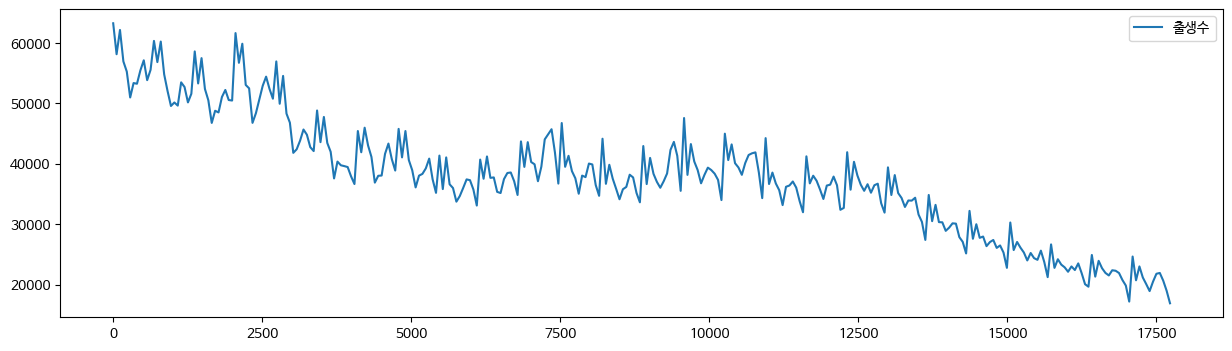

In [55]:
df_all.plot(figsize=(15,4))

<Axes: xlabel='연도,월'>

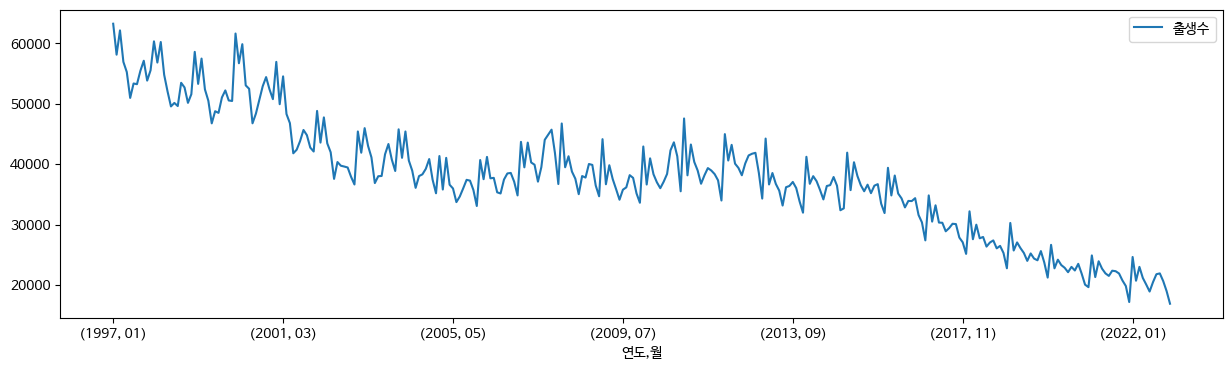

In [56]:
df_all.set_index(['연도','월']).plot(figsize=(15,4))

In [60]:
df_all.head(5)

,시군구별,기간,출생수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
58,전국,1997.02,58144.0,1997,02,전체
115,전국,1997.03,62160.0,1997,03,전체
172,전국,1997.04,56949.0,1997,04,전체
229,전국,1997.05,55270.0,1997,05,전체


<Axes: xlabel='연도,월'>

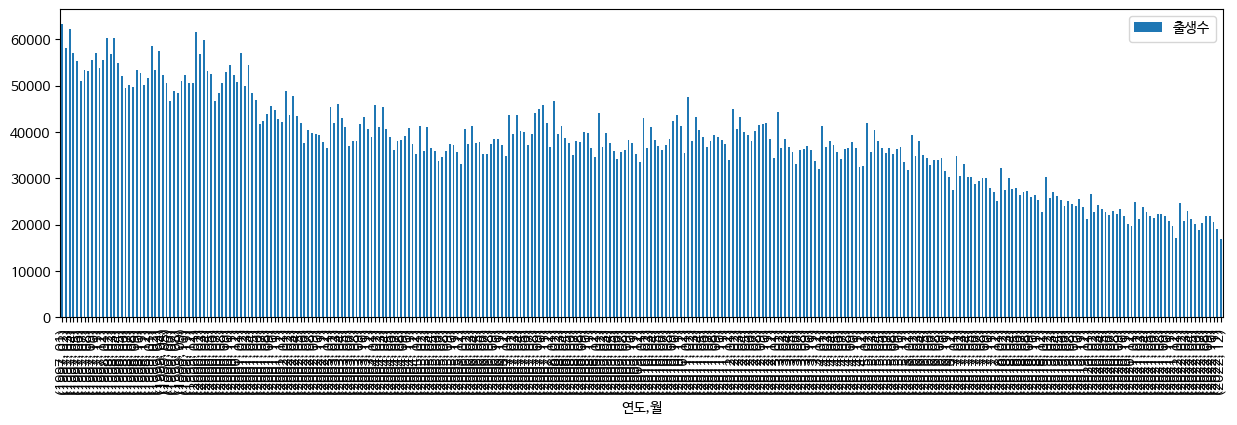

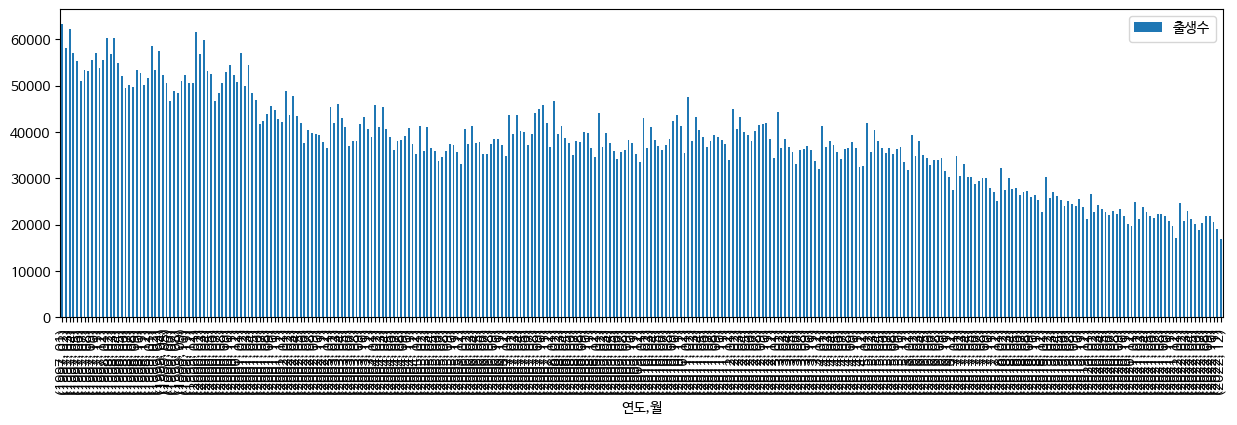

In [64]:
df_all.set_index(['연도','월']).plot.bar(figsize=(15,4))
df_all.set_index(['연도','월']).plot(kind='bar',figsize=(15,4))

<Axes: xlabel='연도,월'>

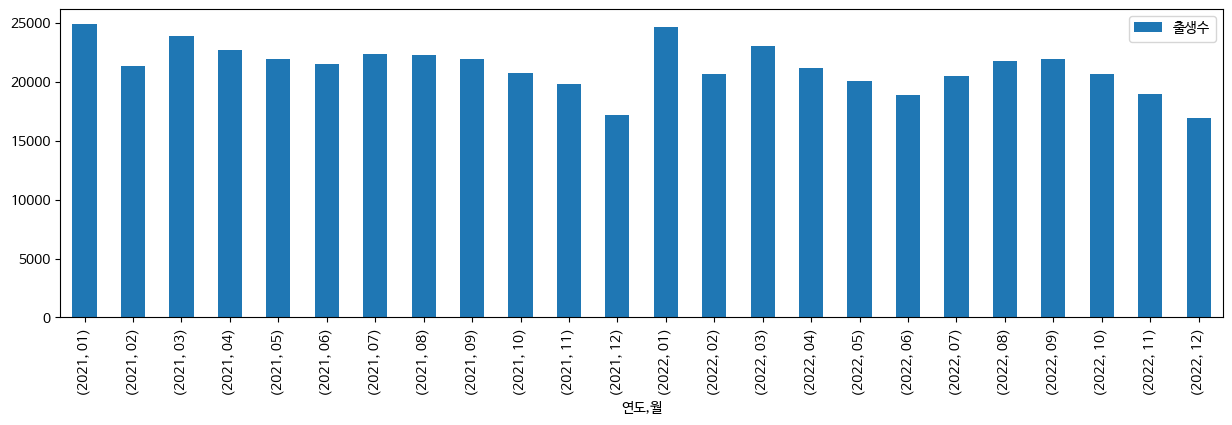

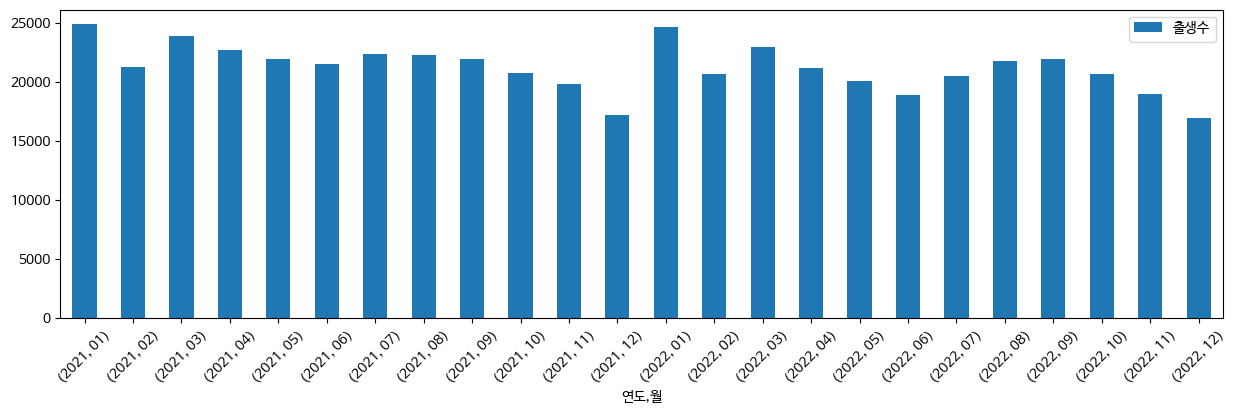

In [71]:
# 연도와 월을 지정해서 출력하기.
# 최근 2년의 자료 출력하기.

df_all.tail(24).set_index(['연도','월']).plot(kind='bar',figsize=(15,4))
df_all[-24:].set_index(['연도','월']).plot(kind='bar',figsize=(15,4), rot=45)

### Seaborn을 통한 시각화

In [73]:
print(dir(sns))

['FacetGrid', 'JointGrid', 'PairGrid', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_compat', '_core', '_decorators', '_docstrings', '_oldcore', '_orig_rc_params', '_statistics', '_stats', 'algorithms', 'axes_style', 'axisgrid', 'barplot', 'blend_palette', 'boxenplot', 'boxplot', 'categorical', 'catplot', 'choose_colorbrewer_palette', 'choose_cubehelix_palette', 'choose_dark_palette', 'choose_diverging_palette', 'choose_light_palette', 'clustermap', 'cm', 'color_palette', 'colors', 'countplot', 'crayon_palette', 'crayons', 'cubehelix_palette', 'dark_palette', 'desaturate', 'despine', 'displot', 'distplot', 'distributions', 'diverging_palette', 'dogplot', 'ecdfplot', 'external', 'get_data_home', 'get_dataset_names', 'heatmap', 'histplot', 'hls_palette', 'husl_palette', 'jointplot', 'kdeplot', 'light_palette', 'lineplot', 'lmplot', 'load_dataset', 'matrix', 'miscplot', 'move_legend', 'mpl', 'mpl_pale

<Axes: xlabel='연도', ylabel='출생수'>

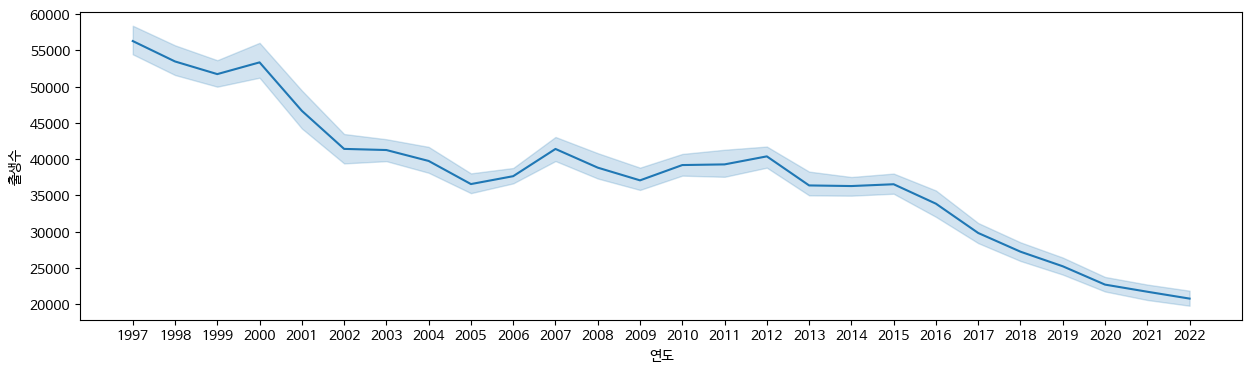

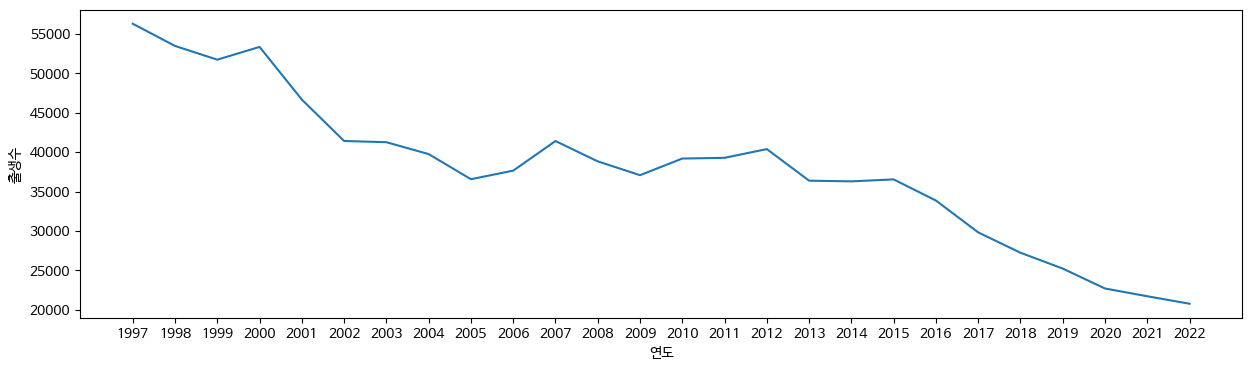

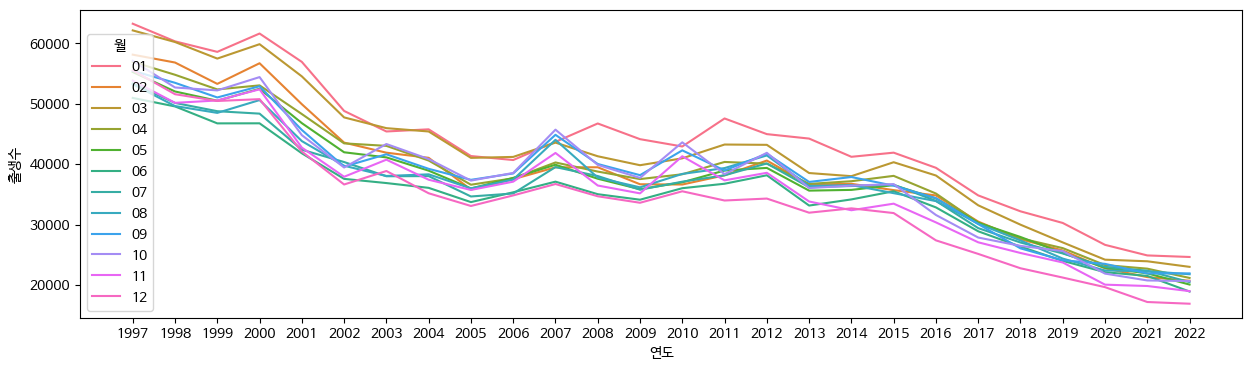

In [82]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_all, x='연도', y='출생수')

# ci(Confidencd Interval : 신뢰구간)
# 신뢰구간 : 통계학에서 모수가 어느 범위 안에 있는지 확률적으로 보여주는 방법이다.
plt.figure(figsize=(15,4))
# sns.lineplot(data=df_all, x='연도', y='출생수', ci = None)
sns.lineplot(data=df_all, x='연도', y='출생수', errorbar=None)


plt.figure(figsize=(15,4))
sns.lineplot(data=df_all, x='연도', y='출생수', errorbar=None, hue='월')

<Axes: xlabel='연도', ylabel='출생수'>

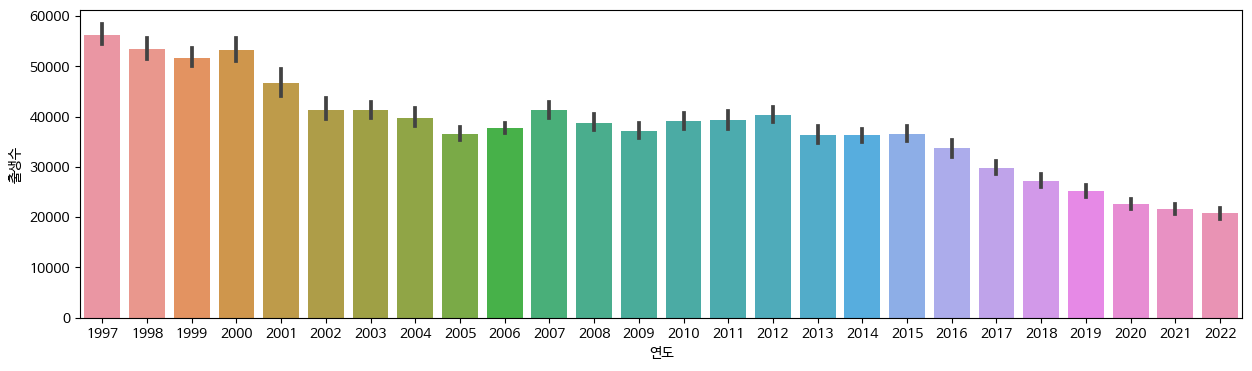

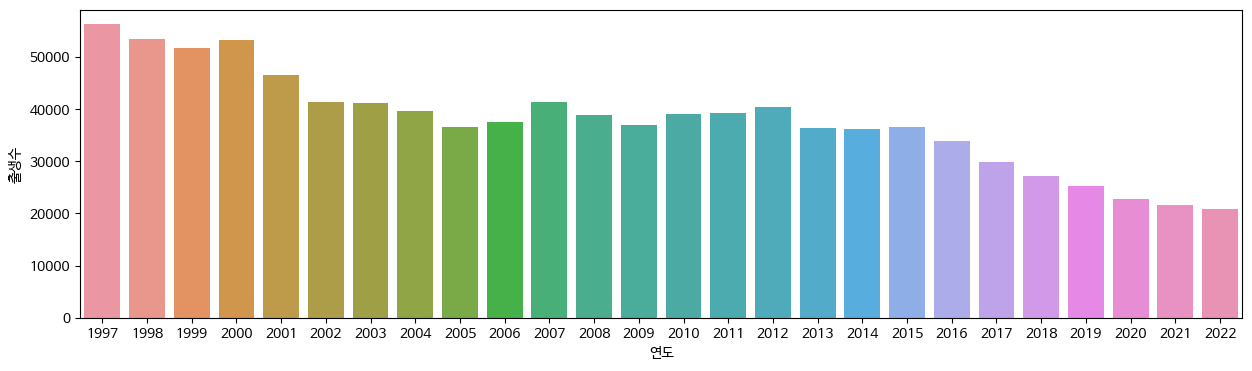

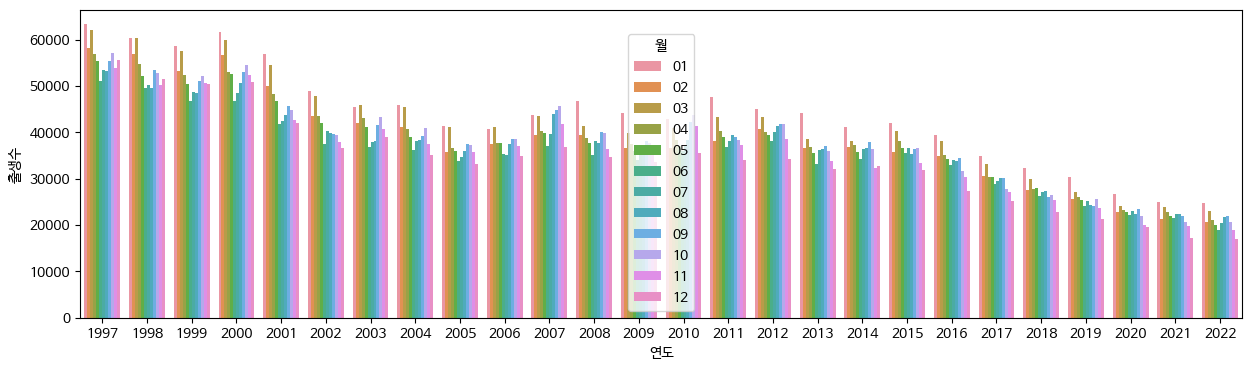

In [84]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_all, x='연도', y='출생수')

# ci(Confidencd Interval : 신뢰구간)
# 신뢰구간 : 통계학에서 모수가 어느 범위 안에 있는지 확률적으로 보여주는 방법이다.
plt.figure(figsize=(15,4))
# sns.lineplot(data=df_all, x='연도', y='출생수', ci = None)
sns.barplot(data=df_all, x='연도', y='출생수', errorbar=None)


plt.figure(figsize=(15,4))
sns.barplot(data=df_all, x='연도', y='출생수', errorbar=None, hue='월')

지역별 출생아수

In [142]:
df_local = df[(df['시군구별']!='전국')]

In [143]:
# df_local = df[(df['시군구별']!='전국')].copy()

In [144]:
df_local.sample(5)

,시군구별,기간,출생수,연도,월,성별
5913,대구광역시,2005.08.2,801.0,2005,08,여
5484,충청북도,2005.01,1272.0,2005,01,전체
5262,제주특별자치도,2004.09,495.0,2004,09,전체
8173,부산광역시,2008.12.1,1045.0,2008,12,남
1674,서울특별시,1999.06.1,5010.0,1999,06,남


In [145]:
df_local['시군구별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

<Axes: xlabel='연도', ylabel='출생수'>

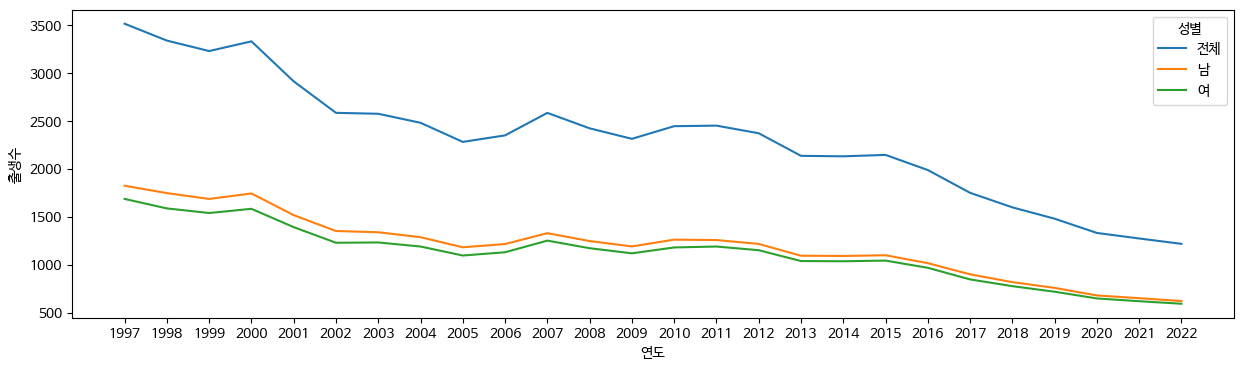

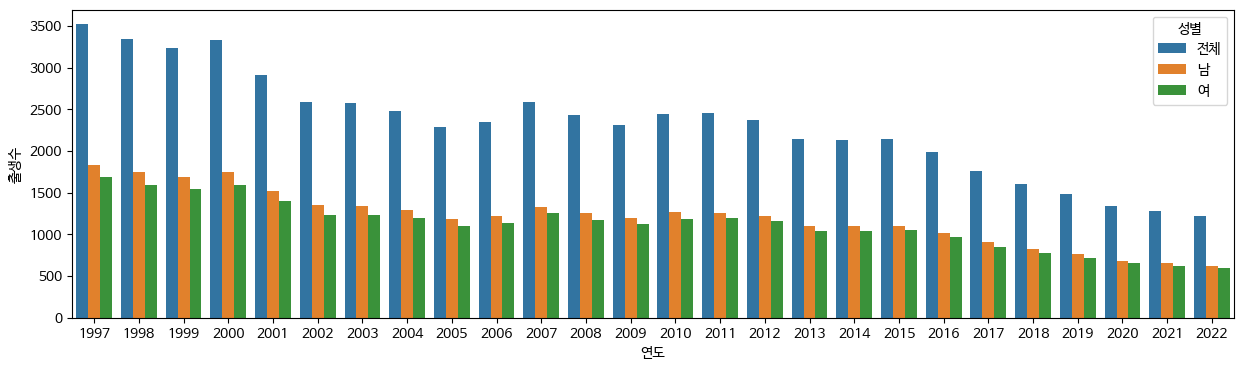

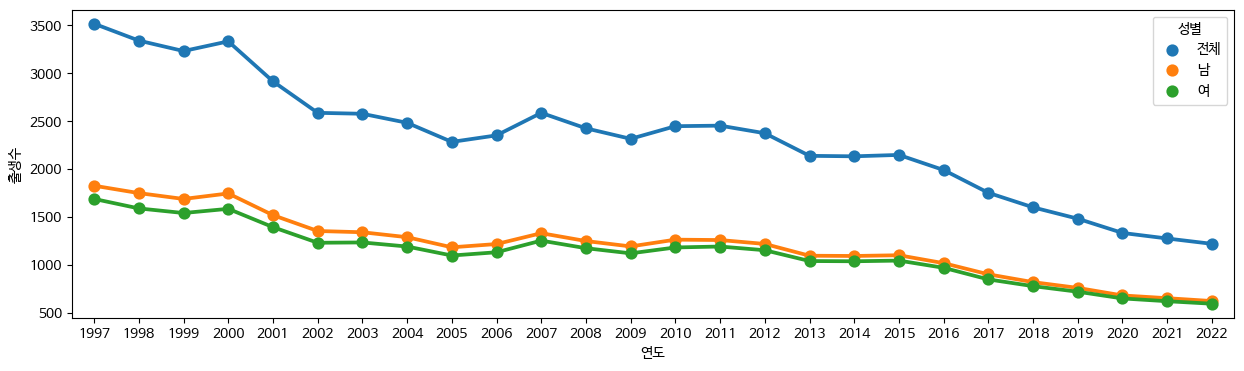

In [146]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_local, x='연도', y='출생수', errorbar=None, hue='성별')

plt.figure(figsize=(15,4))
sns.barplot(data=df_local, x='연도', y='출생수', errorbar=None, hue='성별')

plt.figure(figsize=(15,4))
sns.pointplot(data=df_local, x='연도', y='출생수', errorbar=None, hue='성별')

<Axes: xlabel='연도', ylabel='출생수'>

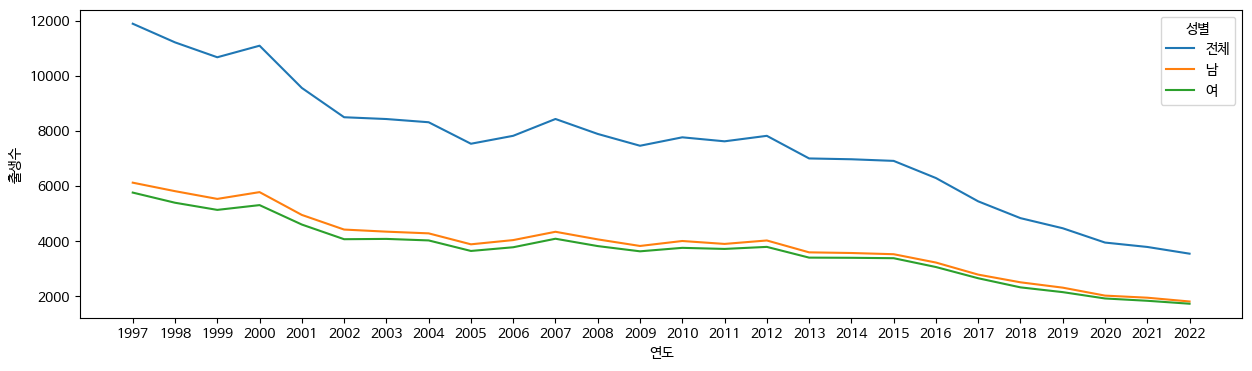

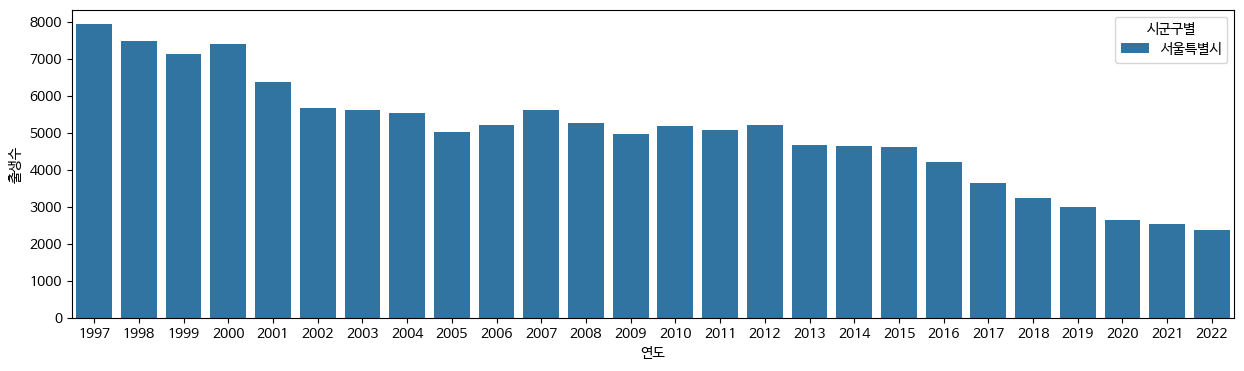

In [147]:
df_seoul = df[(df['시군구별']=='서울특별시')]

plt.figure(figsize=(15,4))
sns.lineplot(data=df_seoul, x='연도', y='출생수', errorbar=None, hue='성별')

plt.figure(figsize=(15,4))
sns.barplot(data=df_seoul, x='연도', y='출생수', errorbar=None, hue='시군구별')

In [148]:
df_seoul['시군구별'].unique()

array(['서울특별시'], dtype=object)

<Axes: xlabel='연도', ylabel='출생수'>

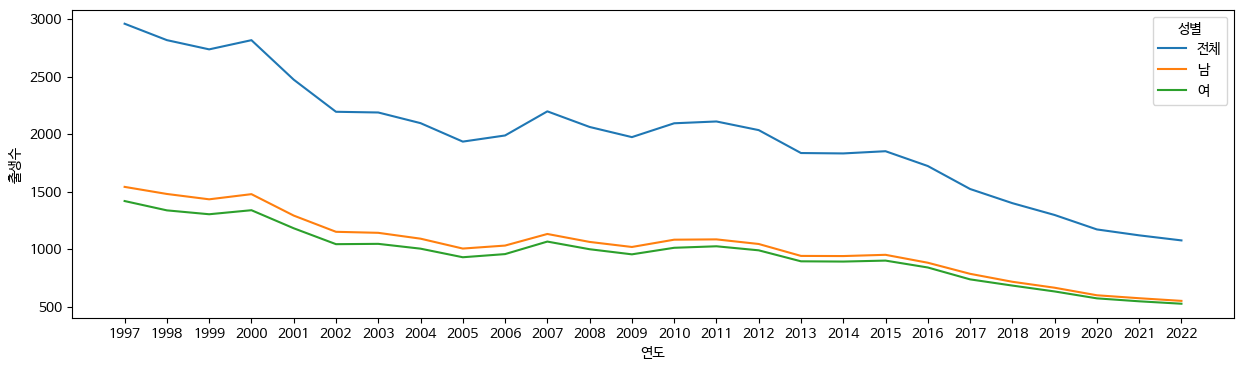

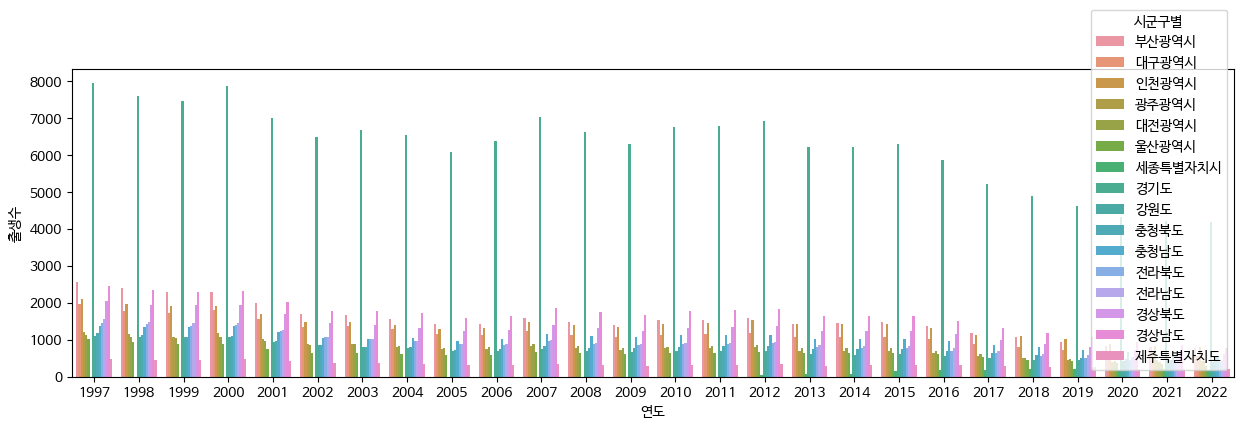

In [149]:
df_local_ = df[(df['시군구별']!='서울특별시') & (df['시군구별']!='전국')]

plt.figure(figsize=(15,4))
sns.lineplot(data=df_local_, x='연도', y='출생수', errorbar=None, hue='성별')

plt.figure(figsize=(15,4))
sns.barplot(data=df_local_, x='연도', y='출생수', errorbar=None, hue='시군구별')

In [150]:
df_local_['시군구별'].unique()

array(['부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'], dtype=object)

In [151]:
# df_local과 df의 행의 개수가 다르므로
# UserWarning: Boolean Series key will be reindexed to match DataFrame index. 라는 경고가 나온다.
# df_local_total = df_local[df['성별']=='전체']

In [152]:
df_local_total = df_local[df_local['성별']=='전체']
df_local_total.tail(5)

,시군구별,기간,출생수,연도,월,성별
17741,전라북도,2022.12,483.0,2022,12,전체
17742,전라남도,2022.12,500.0,2022,12,전체
17743,경상북도,2022.12,770.0,2022,12,전체
17744,경상남도,2022.12,993.0,2022,12,전체
17745,제주특별자치도,2022.12,233.0,2022,12,전체


In [153]:
df_local_total['성별'].unique()

array(['전체'], dtype=object)

In [154]:
df_local_total['시군구별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [155]:
df_local_total_2 = df_local_total[df_local_total['시군구별'].isin(['서울특별시', '경기도', '세종특별자치시'])]

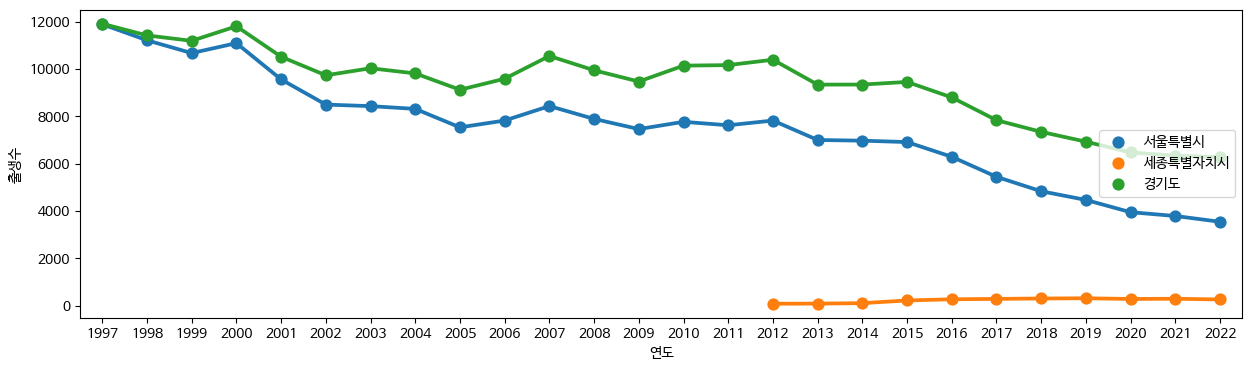

In [161]:
plt.figure(figsize=(15,4))
sns.pointplot(data = df_local_total_2, x='연도', y='출생수', errorbar=None, hue='시군구별')
# 범례위치
plt.legend(loc='center right')
plt.show()

In [156]:
#DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
#and should_run_async(code)
#!pip install --upgrade ipykernel

In [ ]:
# import warnings
# warnings.filterwarnings(action='default')  # 경고 보이기 (default)
# warnings.filterwarnings(action='ignore')  #  경고 감추기

In [164]:
# Null값 지우기
# .dropna()

df_local_total_3 = df_local_total_2[df_local_total_2['시군구별']=='세종특별자치시'].dropna()
df_local_total_3['시군구별'].unique()

array(['세종특별자치시'], dtype=object)

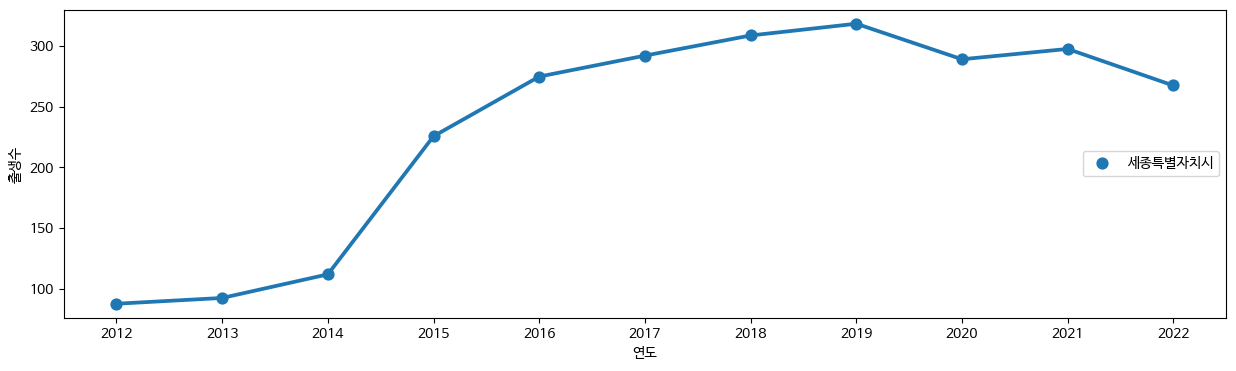

In [165]:
plt.figure(figsize=(15,4))
sns.pointplot(data = df_local_total_3, x='연도', y='출생수', errorbar=None, hue='시군구별')
# 범례위치
plt.legend(loc='center right')
plt.show()